In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize


In [4]:
# task 1
# зарузите данные ex3data1.mat из файла.

def normalize(df):
    return (df - df.min()) / (df.max() - df.min())


data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab03/data/ex3data1.mat')


def row(field):
    return data[field].squeeze()

x = data["X"]
y = data["y"].squeeze()
xval = data["Xval"]
yval = data["yval"].squeeze()
xtest = data["Xtest"]
ytest = data["ytest"].squeeze()


Task 1


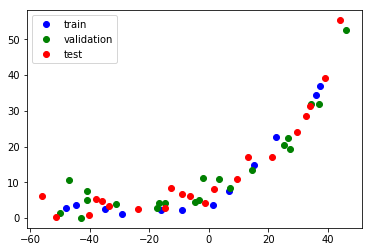

In [5]:

# task 2
# Постройте график, где по осям откладываются X и y из обучающей выборки.

def show_data():
    plt.plot(x, y, 'bo', label='train')
    plt.plot(xval, yval, 'go', label="validation")
    plt.plot(xtest, ytest, 'ro', label="test")
    plt.legend(loc='upper left')
    plt.show()

print("Task 1")
show_data()


In [6]:

# task 3
# Реализуйте функцию стоимости потерь для линейной регрессии с L2-регуляризацией.

def cost(theta, x, y, lambda_):
    prediction = theta.dot(x.T)
    difference = prediction - y.squeeze()
    square_difference = sum(difference ** 2)
    l2_regularization = lambda_ * sum(theta ** 2)
    return (square_difference + l2_regularization) / (2 * len(y))


def get_init_data(x, y):
    extendedX = np.hstack((np.ones((len(x), 1)), x))
    theta = np.ones(extendedX.shape[1])
    return extendedX, theta

In [7]:

def line(x, theta):
    return x*theta[0] + theta[1]

In [8]:

# task 4
# Реализуйте функцию градиентного спуска для линейной регрессии с L2-регуляризацией.

# normalized
# x = [
#     [1,0.232]
#     [1, 0.232]
#     [1, 0.232]
# ...
# ]
# normalized
# y = [
#     [1]
#     [0.232]
#     [0]
# ...
# ]
# theta = [[1],[1]]

def grad_reg(X, y, theta, alpha=0.01, lambda_ = 1, iterations=1000):
    m = len(y)
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y))+ lambda_*theta)
    return theta

def grad(X, y, theta, alpha=0.01, iterations=1000):
    m = len(y)
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
    return theta

def cal_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))
    return cost

def show_learn_progress(theta, x, y, lambda_, style="r-", show_plot=False):
    cost_history = []
    for iteration in range(1, len(x)):
        theta = scipy.optimize.minimize(cost, theta, (x, y, lambda_), method='CG').x
        cost_history.append(cost(theta, x[:iteration], y[:iteration], lambda_))
    plt.plot(range(len(cost_history)), cost_history, style)
    if show_plot:
        plt.show()


def norm(x):
    m, n = x.shape
    for columnIndex in range(n):
        column = x[:, columnIndex]
        min_value, max_value = min(column), max(column)
        denominator = max_value - min_value if (max_value - min_value) != 0 else 1
        normalize_column = (column - min_value) / denominator
        x[:, columnIndex] = normalize_column
    return x

validation cost:34.63401646673061


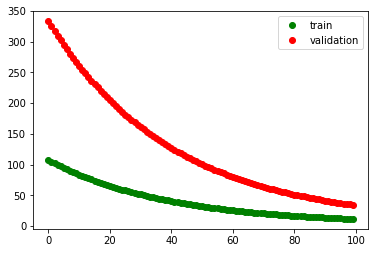

In [13]:
# task 6
# Постройте график процесса обучения (learning curves) для обучающей и валидационной выборки. По оси абсцисс откладывается число элементов из обучающей выборки, а по оси ординат - ошибка (значение функции потерь) для обучающей выборки (первая кривая) и валидационной выборки (вторая кривая). Какой вывод можно сделать по построенному графику?


def show_compared_learn_progress(x, y, xval, yval, lambda_, iterations=100, show_plot=False):
    cost_history_train = []
    cost_history_valid = []
    x = norm(x)
    x = np.c_[np.ones((len(x), 1)), x]
    y = norm(y)
    xval = norm(xval)
    xval = np.c_[np.ones((len(xval), 1)), xval]
    yval = norm(yval)
    theta = np.array([[1],[1]])
    for _ in range(iterations):
        theta = grad(x,y,theta, iterations=1)
        cost_history_train.append(cal_cost(x, y, theta,))
        cost_history_valid.append(cal_cost(xval, yval, theta))
    plt.plot(range(len(cost_history_train)), cost_history_train, "go", label="train")
    plt.plot(range(len(cost_history_valid)), cost_history_valid, "ro", label="validation")
    print("validation cost:"+str(cost_history_valid[-1]))
    if show_plot:
        plt.legend(loc='upper right')
        plt.show()

lambda_ = 1

show_compared_learn_progress(x, data["y"], xval, data["yval"], lambda_, show_plot=True)

In [11]:
# task 7
#Реализуйте функцию добавления p - 1 новых признаков в обучающую выборку (X2, X3, X4, …, Xp).

def add_param(x, count):
    return np.hstack((x, np.zeros((len(x), count-1))))


In [14]:

# task 8
# Поскольку в данной задаче будет использован полином высокой степени,
# то необходимо перед обучением произвести нормализацию признаков.

# Xnorm = (X - Xmin) / (Xmax - Xmin)

# task 9
# Обучите модель с коэффициентом регуляризации 0 и p = 8.

def model(x, lambda_=0, p=8):
    x_bs = add_param(x, 8)
    norm(x_bs)
    x_bs, theta = get_init_data(x_bs, y)
    theta = scipy.optimize.minimize(cost, theta, (x_bs, y, lambda_), method='CG').x
    return x_bs, theta


newX = add_param(x, 2)
norm(newX)
newX, theta = model(x)

Task 10: showing l2 reg = 0 plot 


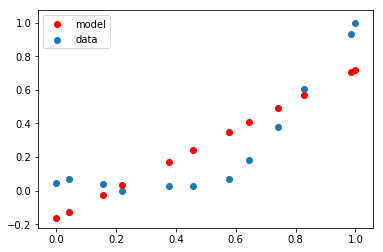

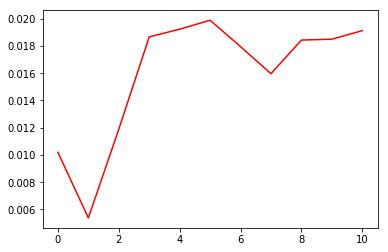

In [15]:
# task 5
# task 10
# Постройте график модели, совмещенный с обучающей выборкой, а также график процесса обучения.
# Какой вывод можно сделать в данном случае?

def train(theta, x, y, lambda_=0):
    plt.scatter(x[:, 1], y, label="data")
    plt.plot(x[:, 1], theta.dot(x.T), "ro", label="model")
    plt.legend(loc='upper left')
    plt.show()
    show_learn_progress(theta, x, y, lambda_, show_plot=True)

print("Task 10: showing l2 reg = 0 plot ")
train(theta, newX, y)

Task 11: showing l2 reg = 1 plot: 


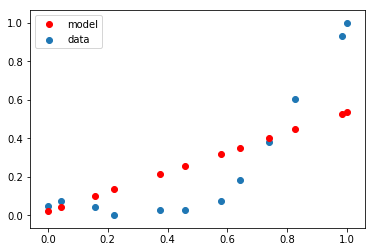

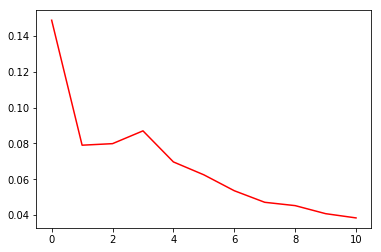

Task 11: showing l2 reg = 100 plot: 


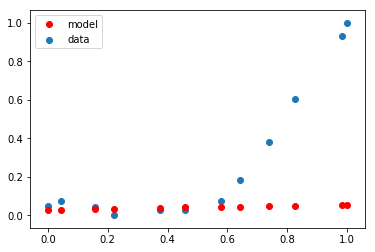

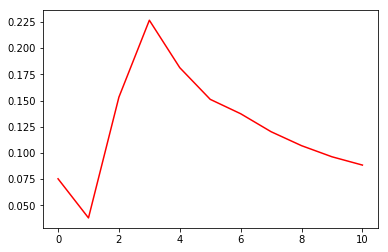

In [16]:


# task 11
#Постройте графики из пункта 10 для моделей с коэффициентами регуляризации 1 и 100. Какие выводы можно сделать?

print("Task 11: showing l2 reg = 1 plot: ")
lambda_ = 1
newX, theta = model(x, lambda_=lambda_)
train(theta, newX, y, lambda_=lambda_)

print("Task 11: showing l2 reg = 100 plot: ")
lambda_=100
newX, theta = model(x, lambda_=lambda_)
train(theta, newX, y, lambda_=lambda_)

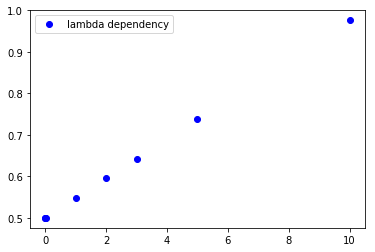

optimal lambda is 0


In [17]:

# task 12
# С помощью валидационной выборки подберите коэффиент регуляризации, который позволяет достичь наименьшей ошибки.
# Процесс подбора отразите с помощью графика (графиков).

lambdas = [10,5,3,2,1, 0, 0.01, 0.0001]

costs = []

for lambda_ in lambdas:
    x, theta = get_init_data(xval, yval)
    costs.append(cost(theta, x, xval, lambda_))

plt.plot(lambdas, costs, "bo", label="lambda dependency")
plt.legend(loc='upper left')
plt.show()

print("optimal lambda is "+str(lambdas[np.argmin(costs)]))
